# Basics of cross validation
Importing the required libraries 

In [19]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.pipeline import Pipeline
from l0bnb import fit_path

# Reading the Data

In [20]:
Hitters = load_data('Hitters')
Hitters = Hitters.dropna();
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
D = design.fit_transform(Hitters)
D = D.drop('intercept', axis=1)
X = np.asarray(D)               # why convert to np array?
Y = np.array(Hitters['Salary'])
# Y = Hitters['Salary']
print(X)
print(X.mean(0))

[[315.  81.   7. ...  43.  10.   1.]
 [479. 130.  18. ...  82.  14.   0.]
 [496. 141.  20. ...  11.   3.   1.]
 ...
 [475. 126.   3. ... 113.   7.   0.]
 [573. 144.   9. ... 131.  12.   0.]
 [631. 170.   9. ...   4.   3.   0.]]
[4.03642586e+02 1.07828897e+02 1.16197719e+01 5.47452471e+01
 5.14866920e+01 4.11140684e+01 7.31178707e+00 2.65754373e+03
 7.22186312e+02 6.92395437e+01 3.61220532e+02 3.30418251e+02
 2.60266160e+02 4.71482890e-01 5.09505703e-01 2.90711027e+02
 1.18760456e+02 8.59315589e+00 4.63878327e-01]


# Ridge Regression and K-Fold Cross Validation Curve

In [21]:
Xs = X - X.mean(0)[None,:] # what is Xs?
# print(Xs)
X_scale = X.std(0)
# print(X_scale)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std() # how to pick lambdas? why is it divided by standard deviation?
print(lambdas)
# print(Y.std())
soln_array = skl.ElasticNet.path(Xs, Y, l1_ratio=0., alphas=lambdas)[1]
soln_array.shape # This is an array that contains the beta (coefficient vector) for each lambda
# print(soln_array)

[2.22093791e+05 1.76005531e+05 1.39481373e+05 1.10536603e+05
 8.75983676e+04 6.94202082e+04 5.50143278e+04 4.35979140e+04
 3.45506012e+04 2.73807606e+04 2.16987845e+04 1.71959156e+04
 1.36274691e+04 1.07995362e+04 8.55844774e+03 6.78242347e+03
 5.37495461e+03 4.25955961e+03 3.37562814e+03 2.67512757e+03
 2.11999285e+03 1.68005808e+03 1.33141730e+03 1.05512544e+03
 8.36168866e+02 6.62649526e+02 5.25138417e+02 4.16163215e+02
 3.29802231e+02 2.61362628e+02 2.07125413e+02 1.64143347e+02
 1.30080796e+02 1.03086806e+02 8.16945308e+01 6.47415185e+01
 5.13065463e+01 4.06595605e+01 3.22220063e+01 2.55353890e+01
 2.02363591e+01 1.60369685e+01 1.27090233e+01 1.00716836e+01
 7.98163700e+00 6.32531083e+00 5.01270066e+00 3.97247954e+00
 3.14812210e+00 2.49483293e+00 1.97711243e+00 1.56682779e+00
 1.24168423e+00 9.84013516e-01 7.79813883e-01 6.17989166e-01
 4.89745845e-01 3.88115207e-01 3.07574664e-01 2.43747661e-01
 1.93165853e-01 1.53080635e-01 1.21313785e-01 9.61391003e-02
 7.61885928e-02 6.037815

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64428165.36474803, tolerance: 12885.7065737425
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:

(19, 100)

Let's print the soln_array as a table

In [22]:
soln_path = pd.DataFrame(soln_array.T, # .T operation is the transpose
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League[N],Division[W],PutOuts,Assists,Errors,NewLeague[N]
negative log(lambda),,,,,,,,,,,,,,,,,,,
-12.310855,0.000800,0.000889,0.000695,0.000851,0.000911,0.000900,0.000812,0.001067,0.001113,0.001064,0.001141,0.001149,0.000993,-0.000029,-0.000390,0.000609,0.000052,-0.000011,-0.000006
-12.078271,0.001010,0.001122,0.000878,0.001074,0.001150,0.001135,0.001025,0.001346,0.001404,0.001343,0.001439,0.001450,0.001253,-0.000037,-0.000492,0.000769,0.000065,-0.000014,-0.000007
-11.845686,0.001274,0.001416,0.001107,0.001355,0.001451,0.001433,0.001293,0.001698,0.001772,0.001694,0.001816,0.001830,0.001581,-0.000046,-0.000621,0.000970,0.000082,-0.000017,-0.000009
-11.613102,0.001608,0.001787,0.001397,0.001710,0.001831,0.001808,0.001632,0.002143,0.002236,0.002138,0.002292,0.002309,0.001995,-0.000058,-0.000784,0.001224,0.000104,-0.000022,-0.000012
-11.380518,0.002029,0.002255,0.001763,0.002158,0.002310,0.002281,0.002059,0.002704,0.002821,0.002698,0.002892,0.002914,0.002517,-0.000073,-0.000990,0.001544,0.000131,-0.000028,-0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.784658,-290.823989,336.929968,37.322686,-59.748520,-26.507086,134.855915,-17.216195,-387.775826,89.573601,-12.273926,476.079273,257.271255,-213.124780,31.258215,-58.457857,78.761266,53.622113,-22.208456,-12.402891
10.017243,-290.879272,337.113713,37.431373,-59.916820,-26.606957,134.900549,-17.108041,-388.458404,89.000707,-12.661459,477.031349,257.966790,-213.280891,31.256434,-58.448850,78.761240,53.645147,-22.198802,-12.391969
10.249827,-290.923382,337.260446,37.518064,-60.051166,-26.686604,134.936136,-17.022194,-388.997470,88.537380,-12.971603,477.791860,258.523025,-213.405740,31.254958,-58.441682,78.761230,53.663357,-22.191071,-12.383205


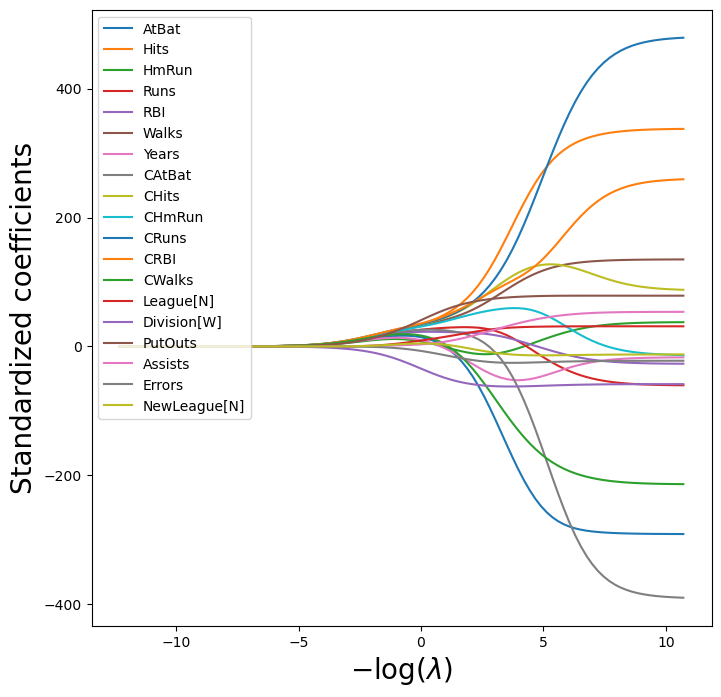

In [23]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

Let's compare two values of beta corresponding to small lambda and large lambda

In [24]:
beta_hat1 = soln_path.loc[soln_path.index[39]] # large
beta_hat2 = soln_path.loc[soln_path.index[59]] # small
print(lambdas[39], np.linalg.norm(beta_hat1))
print(lambdas[59], np.linalg.norm(beta_hat2))

25.53538897200662 24.17061720144378
0.24374766133488554 160.42371017725898


You can also run Ridge for a single lambda if you do not like to run skl.ElasticNet.path

In [25]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)]) #  why using Pipeline?
pipe.fit(X, Y)
# Let's print the norm of beta_hat
np.linalg.norm(ridge.coef_)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+07, tolerance: 5.332e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


160.42371017725904

Now we can estimate the test error using 5-fold cross validation

In [26]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
print(grid.best_estimator_)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+07, tolerance: 4.201e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.01185247763144249, l1_ratio=0))])


/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.890e+06, tolerance: 4.466e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.636e+06, tolerance: 4.445e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in

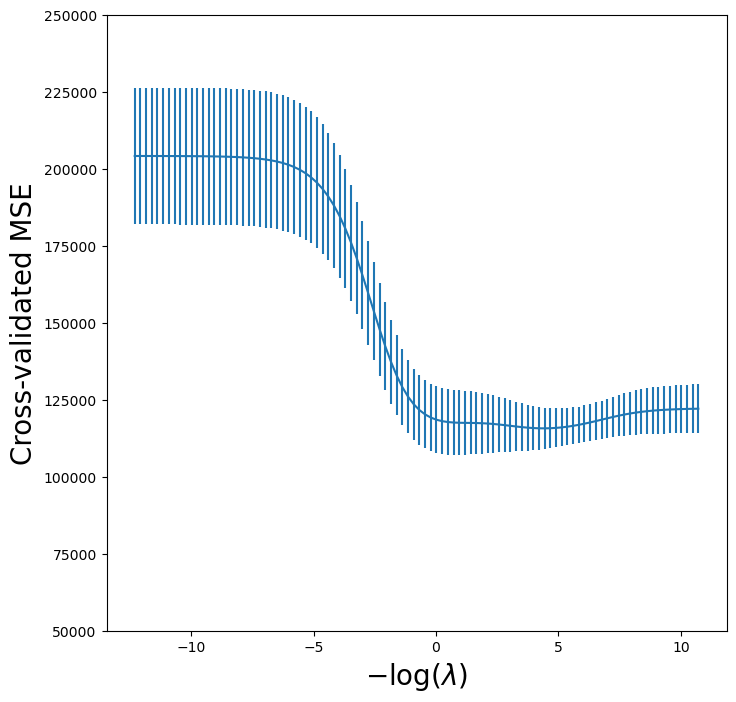

In [27]:
ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

# A Fast Cross-Validation for Solution Paths
The ridge, lasso, and elastic net can be efficiently fit along a sequence of lambda values, creating what is known as a solution path or regularization path. Hence there is specialized code to fit such paths, and to choose a suitable value of lambda using cross-validation. Even with identical splits the results will not agree exactly with our grid above because the standardization of each feature in grid is carried out on each fold, while in pipeCV below it is carried out only once. Nevertheless, the results are similar as the normalization is relatively stable across folds.

In [28]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, 
                           l1_ratio=0,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X, Y)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18795326.355502333, tolerance: 3759.109166869193
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.p

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606e+04, 2.16987845e+04, 1.71959156e+04,
       1.36274691e+04, 1.07995362e+04, 8.55844774e+03, 6.78242347e+03,
       5.37495461e+03, 4.25955961e+03,...
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

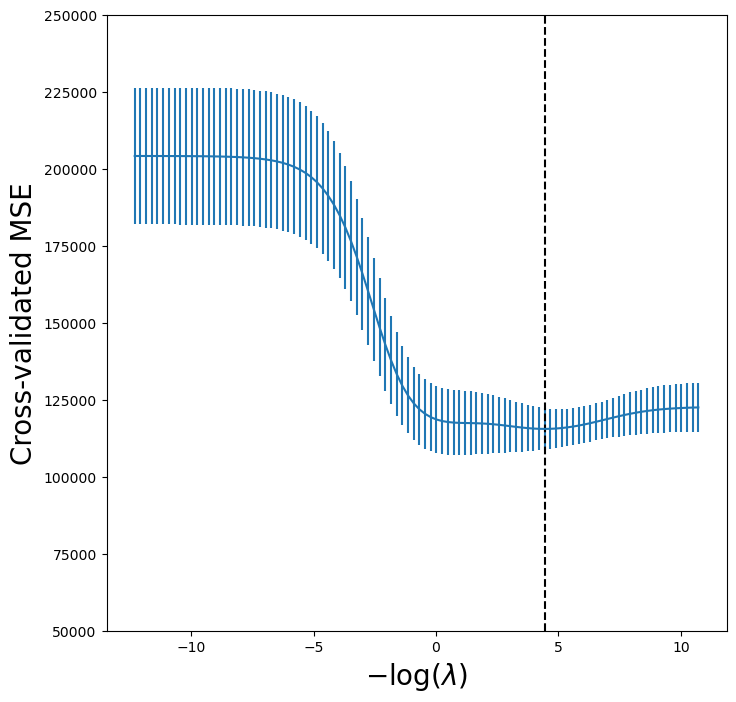

In [29]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

# LASSO

In [30]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_ #printing the lambda that yields the smallest CV error

3.1472370031649866

In [31]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))

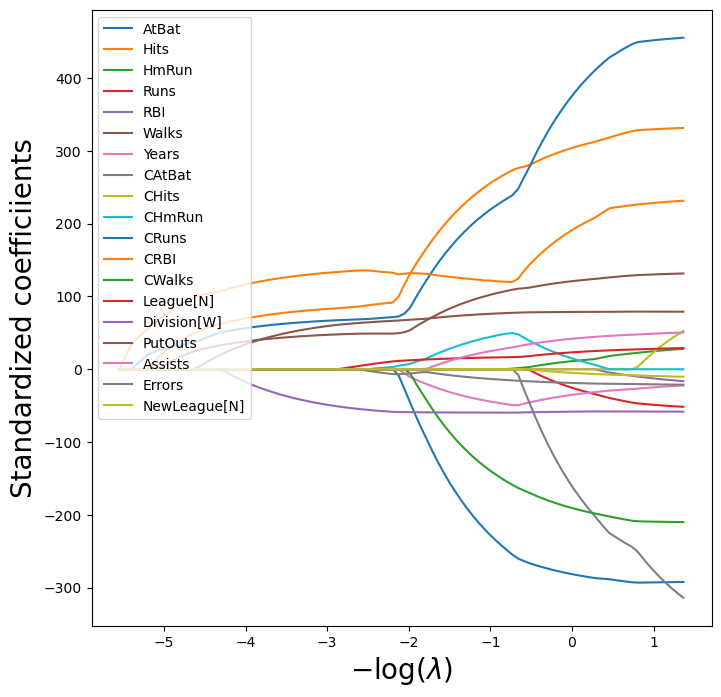

In [32]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [33]:
np.min(tuned_lasso.mse_path_.mean(1))

114690.73118253607

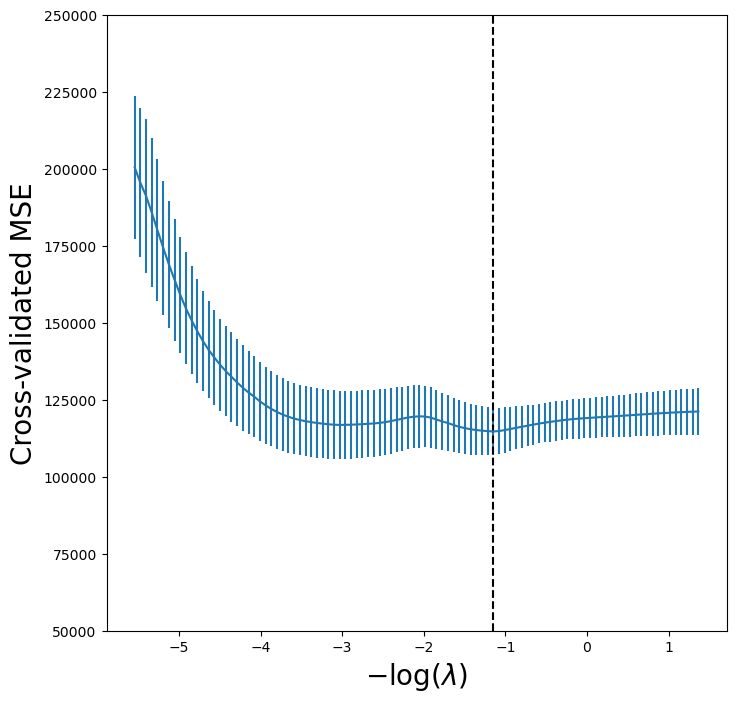

In [34]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [35]:
print(tuned_lasso.coef_)

[-210.01008773  243.4550306     0.            0.            0.
   97.69397357  -41.52283116   -0.            0.           39.62298193
  205.75273856  124.55456561 -126.29986768   15.70262427  -59.50157967
   75.24590036   21.62698014  -12.04423675   -0.        ]


In [36]:
print('The number of non-zero coefficient estimates:',np.sum(tuned_lasso.coef_ != 0))

The number of non-zero coefficient estimates: 13
